In [111]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Wczytaj dane
data = pd.read_csv('platki_dane_zad4.csv', sep=';', header=0)
data

# zamiana inicjałow producentów na liczby
data['producent'] = data['producent'].astype('category')
data['producent'] = data['producent'].cat.codes
data

,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,3,70,6,5.0,4,1,130,10.0,280,3,N,0,0,1
1,100%_Natural_Bran,5,120,8,8.0,3,5,15,2.0,135,3,N,0,0,1
2,All-Bran,2,70,5,7.0,4,1,260,9.0,320,3,N,0,0,1
3,All-Bran_with_Extra_Fiber,2,50,0,8.0,4,0,140,14.0,330,3,N,0,0,1
4,Almond_Delight,6,110,8,14.0,2,2,200,1.0,1,3,N,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Shredded_Wheat_spoon_size,3,90,0,20.0,3,0,0,3.0,120,1,N,1,0,0
73,Special_K,2,110,3,16.0,6,0,230,1.0,55,1,N,1,0,0
74,Wheat_Chex,6,100,3,17.0,3,1,230,3.0,115,1,N,1,0,0
75,Wheaties,1,100,3,17.0,3,1,200,3.0,110,1,N,1,0,0


0.6086956521739131
[[3 3 1]
 [1 4 2]
 [0 2 7]]
              precision    recall  f1-score   support

           1       0.75      0.43      0.55         7
           2       0.44      0.57      0.50         7
           3       0.70      0.78      0.74         9

    accuracy                           0.61        23
   macro avg       0.63      0.59      0.59        23
weighted avg       0.64      0.61      0.61        23



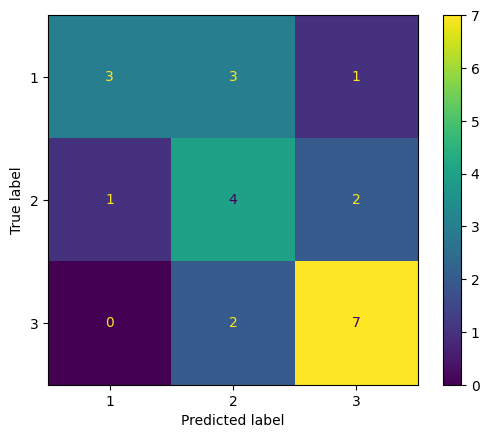

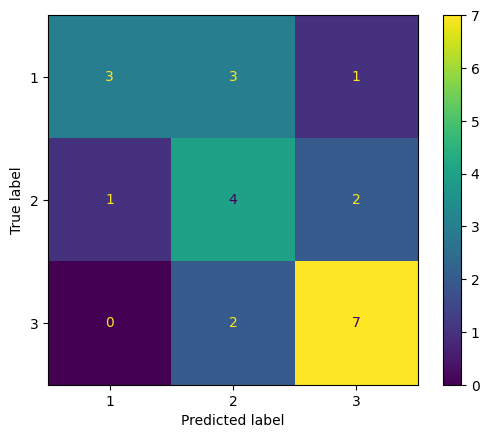

,Liczba_polek_pred,Liczba_polek,nazwa
4,2,3,Almond_Delight
49,3,2,Life
73,2,1,Special_K
47,2,2,Honey_Graham_Ohs
74,1,1,Wheat_Chex
64,2,1,Honey_Nut_Cheerios
35,2,3,Triples
38,2,2,Cinnamon_Toast_Crunch
40,2,2,Corn_Pops
10,3,3,Crispy_Wheat_&_Raisins


In [112]:
# klasyfiklacja knn miejska (manhattan)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie', 'producent']]
y= data[['Liczba_polek']]
X_train, X_walidacyjne, y_train, y_walidacyjne = train_test_split(X, y, test_size=0.6, random_state=42)



X_walidacyjne, X_test, y_walidacyjne, y_test = train_test_split(X_walidacyjne, y_walidacyjne, test_size=0.5, random_state=42)


# Flatten the target variable y
# Flatten the target variable y but keep it as a Pandas Series
y_train = y_train.squeeze()  # If y_train is still a DataFrame
y_walidacyjne = y_walidacyjne.squeeze()



# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_walidacyjne)
print(accuracy_score(y_walidacyjne, y_pred))
print(confusion_matrix(y_walidacyjne, y_pred))
print(classification_report(y_walidacyjne, y_pred))


# Wykres macierzy konfuzji
disp = ConfusionMatrixDisplay.from_estimator(knn, X_walidacyjne, y_walidacyjne)
disp.plot()
plt.show()


# tabela z wynikami klasyfikacji oraz nazwą płatków
y_pred_df = pd.DataFrame(y_pred, columns=['Liczba_polek_pred'], index=y_walidacyjne.index)
y_pred_df['Liczba_polek'] = y_walidacyjne
y_pred_df['nazwa'] = data.loc[y_walidacyjne.index, 'nazwa'].values

y_pred_df

# rozmiar zbioru walidacyjnego



In [113]:

# klasyfiklacja knn euklides
# dane testowe
y_pred_test = knn.predict(X_test)
y_pred_test_df = pd.DataFrame(y_pred_test, columns=['Liczba_polek_pred'], index=y_test.index)
y_pred_test_df['nazwa'] = data.loc[y_test.index, 'nazwa'].values
y_pred_test_df

,Liczba_polek_pred,nazwa
7,3,Clusters
3,3,All-Bran_with_Extra_Fiber
31,1,Raisin_Squares
61,1,Corn_Flakes
65,2,Honey-comb
42,2,Cream_of_Wheat_(Quick)
18,3,Just_Right_Fruit_&_Nut
22,3,Nutri-Grain_Almond-Raisin
45,2,Fruity_Pebbles
54,2,Smacks


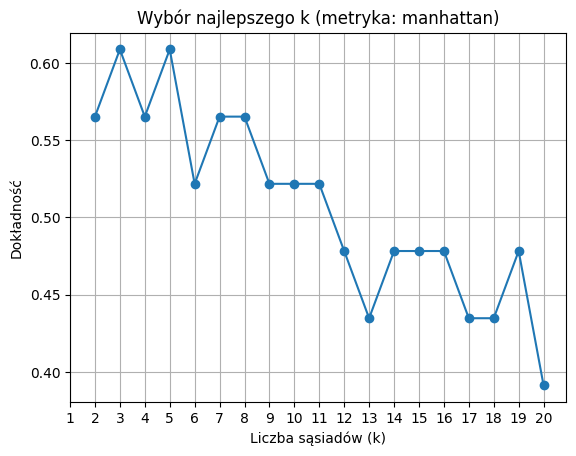

Najlepszy k: 3 z dokładnością: 0.61
Manhattan


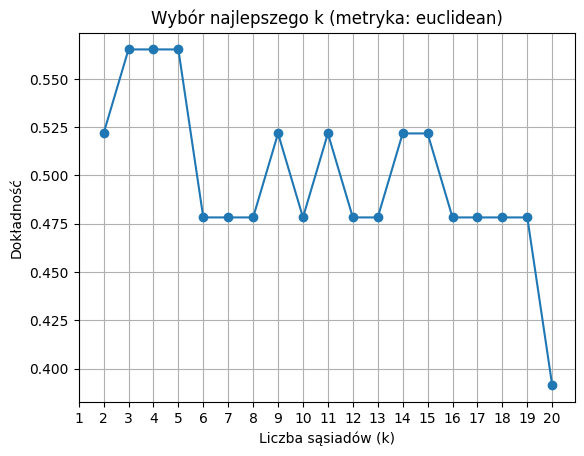

Najlepszy k: 3 z dokładnością: 0.57
Euklides


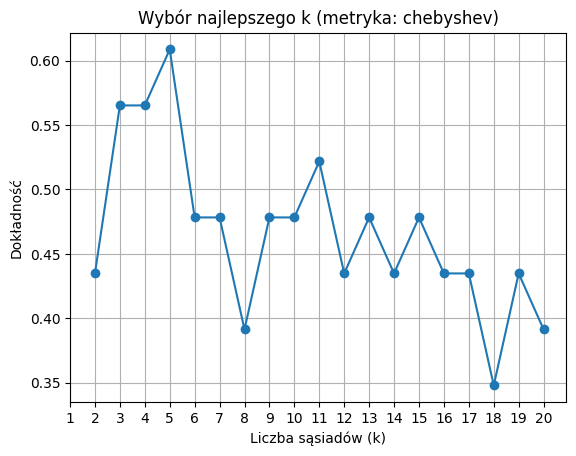

Najlepszy k: 5 z dokładnością: 0.61
Chebyshev
0.6086956521739131


In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=20, metric='manhattan'):
    """
    Znajduje najlepszą liczbę sąsiadów dla klasyfikatora KNN.

    Parameters:
        X_train: Dane treningowe (cechy).
        X_walidacyjne: Dane walidacyjne (cechy).
        y_train: Etykiety dla danych treningowych.
        y_walidacyjne: Etykiety dla danych walidacyjnych.
        max_k: Maksymalna liczba sąsiadów do przetestowania.
        metric: Metryka odległości, np. 'manhattan', 'euclidean', 'chebyshev'.

    Returns:
        najlepszy_k: Najlepsza liczba sąsiadów.
        najlepszy_model: Model KNN z najlepszym dopasowaniem.
    """
    scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        # Tworzenie i trenowanie modelu KNN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Ocena modelu na danych walidacyjnych
        y_pred = knn.predict(X_walidacyjne)
        accuracy = accuracy_score(y_walidacyjne, y_pred)
        scores.append(accuracy)

    # Znajdowanie najlepszego k
    najlepszy_k = k_values[scores.index(max(scores))]
    najlepszy_model = KNeighborsClassifier(n_neighbors=najlepszy_k, metric=metric)
    najlepszy_model.fit(X_train, y_train)

    # Wizualizacja wyników
    plt.plot(k_values, scores, marker='o')
    plt.xticks(np.arange(1, max_k + 1, step=1))  # Skala całkowita dla liczby sąsiadów

    plt.xlabel('Liczba sąsiadów (k)')
    plt.ylabel('Dokładność')
    plt.title(f'Wybór najlepszego k (metryka: {metric})')
    plt.grid(True)
    plt.show()

    print(f'Najlepszy k: {najlepszy_k} z dokładnością: {max(scores):.2f}')
    return najlepszy_k, najlepszy_model

najlepszy_k, najlepszy_model = find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=20, metric='manhattan')
print('Manhattan')
najlepszy_k, najlepszy_model = find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=20, metric='euclidean')
print('Euklides')
najlepszy_k, najlepszy_model = find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=20, metric='chebyshev')
print('Chebyshev')

# Przewidywanie za pomocą najlepszego modelu
y_pred = najlepszy_model.predict(X_walidacyjne)
print(accuracy_score(y_walidacyjne, y_pred))


0.36666666666666664
[[9 0 0 0 0 0]
 [6 0 1 2 0 0]
 [1 0 2 0 0 0]
 [2 1 0 0 0 0]
 [1 1 1 0 0 0]
 [3 0 0 0 0 0]]
              precision    recall  f1-score   support

           1       0.41      1.00      0.58         9
           2       0.00      0.00      0.00         9
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3

    accuracy                           0.37        30
   macro avg       0.15      0.28      0.19        30
weighted avg       0.17      0.37      0.23        30



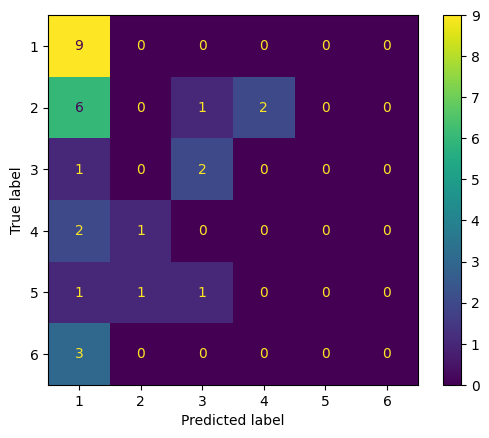

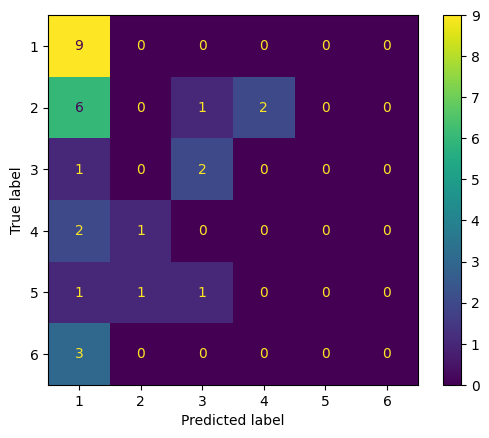

producent
2    23
1    22
4     9
5     8
6     8
3     6
Name: count, dtype: int64
producent
2    4
1    4
4    2
5    2
6    2
3    1
Name: count, dtype: int64
producent
1    9
2    9
6    3
3    3
5    3
4    3
Name: count, dtype: int64


In [124]:
# klasyfiklacja knn miejska (manhattan)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


X= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie', 'Liczba_polek']]
y= data[['producent']]

# usun producenta o nr 0
X_train, X_walidacyjne, y_train, y_walidacyjne = train_test_split(
    X, y, test_size=0.6, random_state=42, stratify=y
)

X_walidacyjne, X_test, y_walidacyjne, y_test = train_test_split(
    X_walidacyjne, y_walidacyjne, test_size=0.5, random_state=42, stratify=y_walidacyjne
)


# Flatten the target variable y
# Flatten the target variable y but keep it as a Pandas Series
y_train = y_train.squeeze()  # If y_train is still a DataFrame
y_walidacyjne = y_walidacyjne.squeeze()



# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_walidacyjne)
print(accuracy_score(y_walidacyjne, y_pred))
print(confusion_matrix(y_walidacyjne, y_pred))
print(classification_report(y_walidacyjne, y_pred, zero_division=0))


# Wykres macierzy konfuzji
disp = ConfusionMatrixDisplay.from_estimator(knn, X_walidacyjne, y_walidacyjne)
disp.plot()
plt.show()


# tabela z wynikami klasyfikacji oraz nazwą płatków
y_pred_df = pd.DataFrame(y_pred, columns=['producent'], index=y_walidacyjne.index)
y_pred_df['producent'] = y_walidacyjne
y_pred_df['nazwa'] = data.loc[y_walidacyjne.index, 'nazwa'].values

y_pred_df

# rozmiar zbioru walidacyjnego

print(X['producent'].value_counts())  # Dystrybucja klas w całym zbiorze danych
print(y_train.value_counts())  # Dystrybucja w zbiorze treningowym
print(y_walidacyjne.value_counts())  # Dystrybucja w zbiorze walidacyjnym


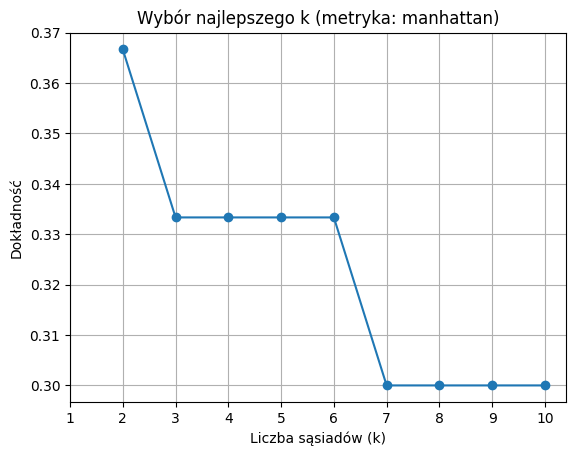

Najlepszy k: 2 z dokładnością: 0.37
Manhattan


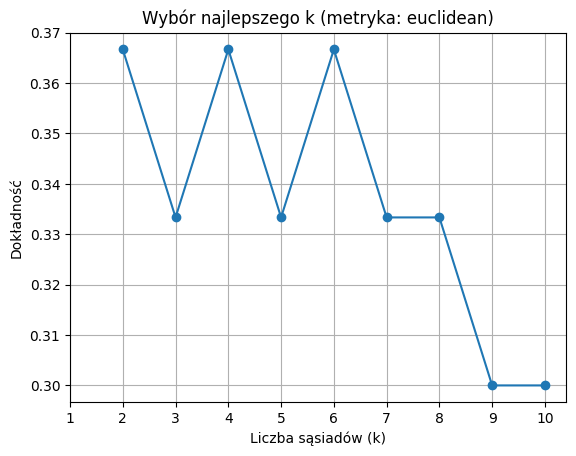

Najlepszy k: 2 z dokładnością: 0.37
Euklides


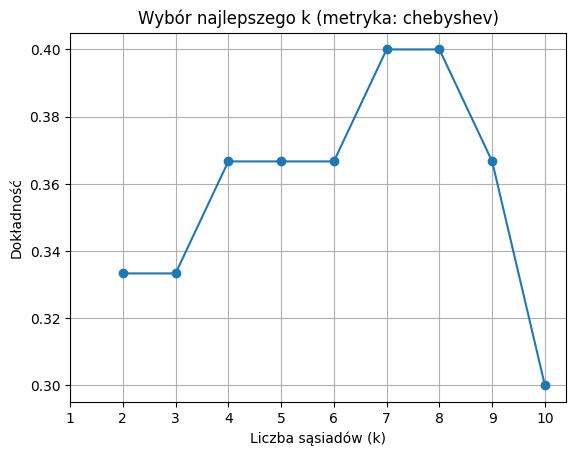

Najlepszy k: 7 z dokładnością: 0.40
Chebyshev
0.4


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=20, metric='manhattan'):
    """
    Znajduje najlepszą liczbę sąsiadów dla klasyfikatora KNN.

    Parameters:
        X_train: Dane treningowe (cechy).
        X_walidacyjne: Dane walidacyjne (cechy).
        y_train: Etykiety dla danych treningowych.
        y_walidacyjne: Etykiety dla danych walidacyjnych.
        max_k: Maksymalna liczba sąsiadów do przetestowania.
        metric: Metryka odległości, np. 'manhattan', 'euclidean', 'chebyshev'.

    Returns:
        najlepszy_k: Najlepsza liczba sąsiadów.
        najlepszy_model: Model KNN z najlepszym dopasowaniem.
    """
    scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        # Tworzenie i trenowanie modelu KNN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Ocena modelu na danych walidacyjnych
        y_pred = knn.predict(X_walidacyjne)
        accuracy = accuracy_score(y_walidacyjne, y_pred)
        scores.append(accuracy)

    # Znajdowanie najlepszego k
    najlepszy_k = k_values[scores.index(max(scores))]
    najlepszy_model = KNeighborsClassifier(n_neighbors=najlepszy_k, metric=metric)
    najlepszy_model.fit(X_train, y_train)

    # Wizualizacja wyników
    plt.plot(k_values, scores, marker='o')
    plt.xticks(np.arange(1, max_k + 1, step=1))  # Skala całkowita dla liczby sąsiadów

    plt.xlabel('Liczba sąsiadów (k)')
    plt.ylabel('Dokładność')
    plt.title(f'Wybór najlepszego k (metryka: {metric})')
    plt.grid(True)
    plt.show()

    print(f'Najlepszy k: {najlepszy_k} z dokładnością: {max(scores):.2f}')
    return najlepszy_k, najlepszy_model

najlepszy_k, najlepszy_model = find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=10, metric='manhattan')
print('Manhattan')
najlepszy_k, najlepszy_model = find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=10, metric='euclidean')
print('Euklides')
najlepszy_k, najlepszy_model = find_best_k(X_train, X_walidacyjne, y_train, y_walidacyjne, max_k=10, metric='chebyshev')
print('Chebyshev')

# Przewidywanie za pomocą najlepszego modelu
y_pred = najlepszy_model.predict(X_walidacyjne)
print(accuracy_score(y_walidacyjne, y_pred))


In [137]:
# Predict the test set
y_pred_walidacyjne = knn.predict(X_walidacyjne)

# Create a DataFrame with the predicted and actual values
X_walidacyjne_df = pd.DataFrame({
    'producent_pred': y_pred_walidacyjne,
    'producent_actual': y_walidacyjne.values.flatten()
}, index=y_walidacyjne.index)

# Display the DataFrame
X_walidacyjne_df

,producent_pred,producent_actual
60,1,6
48,1,1
72,3,3
73,1,2
53,4,2
26,1,2
11,1,6
32,1,1
28,3,5
34,1,1


In [139]:
# dane testowe
y_pred_test = knn.predict(X_test)
y_pred_test_df = pd.DataFrame(y_pred_test, columns=['producent_pred'], index=y_test.index)
y_pred_test_df

,producent_pred
69,1
55,3
43,1
24,1
63,1
57,1
12,4
33,4
15,1
18,1


In [127]:

print(X['kalorie'].value_counts())  # Dystrybucja klas w całym zbiorze danych
print(y_train.value_counts())  # Dystrybucja w zbiorze treningowym
print(y_walidacyjne.value_counts())  # Dystrybucja w zbiorze walidacyjnym

kalorie
110    29
100    16
120    10
90      7
50      3
140     3
70      2
130     2
150     2
160     1
80      1
Name: count, dtype: int64
producent
2    4
1    4
4    2
5    2
6    2
3    1
Name: count, dtype: int64
producent
1    9
2    9
6    3
3    3
5    3
4    3
Name: count, dtype: int64
